# **Project Name**     - EDA (PlayStore User Reviews)

# **1) Data wrangling**

In [ ]:
# Import necessary library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Supress and ignore warnings

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Mounting Google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading the Dataset

user_review = pd.read_csv('/content/drive/MyDrive/Datasets/Play Store Reviews.csv')

In [ ]:
#creating a shallow copy of the dataset
#This is done so that the original dataset remains intact
#We will perform all analysis on this shallow copy

user_review_df = user_review.copy()

In [ ]:
#Dataset first view
user_review_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


**Variable Description**

**1.) App** - the name of the app being reviewed

**2.) Translated_Review** - the text of the review (translated to English)

**3.) Sentiment** - the sentiment expressed by the review (positive, negative, or neutral)

**4.) Sentiment_Polarity** - a numerical score indicating the emotional tone or sentiment of text (ranging from -1 to 1)

**5.) Sentiment_Subjectivity** - a numerical score indicating the sentiment
      subjectivity expressing personal feelings, opinions, beliefs, or
       judgments(ranging from 0 to 1)

In [ ]:
#Sample() function returns 'n' random rows of the datset
user_review_df.sample(n=10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
13266,Be A Legend: Soccer,Slow loading For first part I playing loading ...,Negative,-0.172917,0.377778
48329,Fotor Photo Editor - Photo Collage & Photo Eff...,NaN,NaN,NaN,NaN
5190,Akinator,Really good ask questions lead person characte...,Positive,0.634570,0.462500
16326,Blood Pressure,This great way track BP easy clear.,Positive,0.444444,0.655556
47678,Flowers Live Wallpaper,Nice,Positive,0.600000,1.000000
64105,Hotspot Shield Free VPN Proxy & Wi-Fi Security,NaN,NaN,NaN,NaN
19393,CBS - Full Episodes & Live TV,NaN,NaN,NaN,NaN
22907,Camera360: Selfie Photo Editor with Funny Sticker,NaN,NaN,NaN,NaN
14683,Bible,Thank So Much!!! I love 2 things me? 1.) Can a...,Positive,0.350000,0.400000
5459,"AliExpress - Smarter Shopping, Better Living",NaN,NaN,NaN,NaN


In [ ]:
#Shape method returns the dimension of dataframe

UR = user_review_df.shape
print(f"No of Rows in dataframe:{UR[0]}")
print(f"No of Columns in dataframe:{UR[1]}")

No of Rows in dataframe:64295
No of Columns in dataframe:5


In [ ]:
# info method prints information about a DataFrame
#including the index and dtype of columns,
#non-null values and memory usage

user_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
# Counting the total number of duplicates in the dataframe
user_review_df.duplicated().sum()

np.int64(33616)

In [ ]:
# Dropping all duplicate values keeping the original value
user_review_df.drop_duplicates(keep="first",inplace = True)

In [ ]:
#Cross-checking the number of duplicates
user_review_df.duplicated().sum()

np.int64(0)

In [ ]:
#finding the Number of null vslues in the dataset
user_review_df.isnull().sum()


,0
App,0
Translated_Review,987
Sentiment,982
Sentiment_Polarity,982
Sentiment_Subjectivity,982


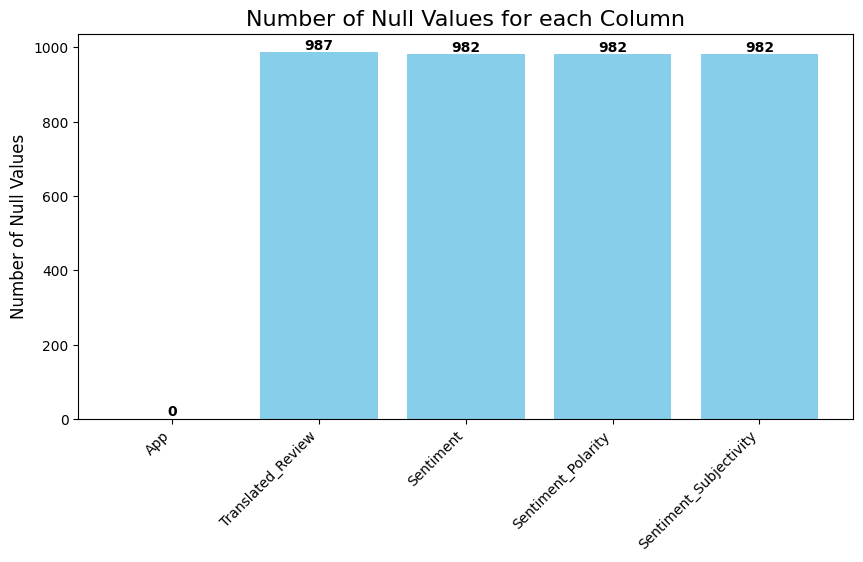

In [ ]:
# Compute missing values per column
missing_values = user_review_df.isnull().sum()

# Create the bar chart

plt.figure(figsize=(10, 5))  # Set figure size
bars= plt.bar(missing_values.index, missing_values.values, color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height),
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customize the plot
plt.ylabel("Number of Null Values", fontsize=12)  # Y-axis label
plt.title("Number of Null Values for each Column", fontsize=16)  # Title

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')


# Show the plot
plt.show()

In [ ]:
#Dropping the null values from dataframe
user_review_df = user_review_df.dropna()

In [ ]:
#Cross verifying the null count
user_review_df.isnull().sum()

,0
App,0
Translated_Review,0
Sentiment,0
Sentiment_Polarity,0
Sentiment_Subjectivity,0


In [ ]:
user_review_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29692 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


In [ ]:
#Statistical description about our dataframe
user_review_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,29692.000000,29692.000000
mean,0.188868,0.490930
std,0.355694,0.265976
min,-1.000000,0.000000
25%,0.000000,0.350000
50%,0.157143,0.514286
75%,0.422917,0.652703
max,1.000000,1.000000


# **2)  Downloading CSV file**

In [ ]:
#Saving the file in CSV format
user_review_df.to_csv("User Review.csv")

In [ ]:
# Downloading the CSV file
from google.colab import files
files.download("User Review.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>